# IA - Modèle MLP - BDD signaux exploitables

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import Fonctions_BDD_Signaux_Artificiels as BDD
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
import seaborn as sns

### Définition de la BDD

In [19]:
liste_comp = BDD.BDD_type('E')

liste_train = []
liste_test = []
for i in range(0,15):
    liste_train.append(liste_comp[i])
for i in range(20,35):
    liste_train.append(liste_comp[i])
for i in range(40,55):
    liste_train.append(liste_comp[i])
for i in range(60,75):
    liste_train.append(liste_comp[i])
for i in range(80,95):
    liste_train.append(liste_comp[i])
for i in range(100,115):
    liste_train.append(liste_comp[i])
for i in range(120,135):
    liste_train.append(liste_comp[i])
for i in range(140,155):
    liste_train.append(liste_comp[i])
for i in range(160,175):
    liste_train.append(liste_comp[i])
for i in range(180,195):
    liste_train.append(liste_comp[i])
for i in range(200,215):
    liste_train.append(liste_comp[i])
for i in range(220,235):
    liste_train.append(liste_comp[i])

    
    
for i in range(15,20):
    liste_test.append(liste_comp[i])
for i in range(35,40):
    liste_test.append(liste_comp[i])
for i in range(55,60):
    liste_test.append(liste_comp[i])
for i in range(75,80):
    liste_test.append(liste_comp[i])
for i in range(95,100):
    liste_test.append(liste_comp[i])
for i in range(115,120):
    liste_test.append(liste_comp[i])
for i in range(135,140):
    liste_test.append(liste_comp[i])
for i in range(155,160):
    liste_test.append(liste_comp[i])
for i in range(175,180):
    liste_test.append(liste_comp[i])
for i in range(195,200):
    liste_test.append(liste_comp[i])
for i in range(215,220):
    liste_test.append(liste_comp[i])
for i in range(235,240):
    liste_test.append(liste_comp[i])

print("Liste complète", len(liste_comp))
print("75%", len(liste_train))
print("25%", len(liste_test))

Liste complète 240
75% 180
25% 60


### Définition des labels

In [3]:
target_train = []
target_test = []

for i in range(0,45):
    target_train.append('Gendarmerie')
for i in range(45,90):
    target_train.append('Police')    
for i in range(90,135):
    target_train.append('Pompiers')
for i in range(135,180):
    target_train.append('Samu')

for i in range(0,15):
    target_test.append('Gendarmerie')
for i in range(15,30):
    target_test.append('Police')
for i in range(30,45):
    target_test.append('Pompiers')
for i in range(45,60):
    target_test.append('Samu')

print(len(target_train))
print(len(target_test))

180
60


### Mélange de la BDD

In [4]:
liste_test_s, target_test_s = shuffle(liste_test, target_test)
liste_train_s, target_train_s = shuffle(liste_train, target_train)

### Définition de image_train et image_test

In [5]:
image_train = BDD.return_image(liste_train_s, 'C:/Users/abras/OneDrive - etu.sorbonne-universite.fr/M1/Projet/Projet_final/Sirenes artificielles')
image_test = BDD.return_image(liste_test_s, 'C:/Users/abras/OneDrive - etu.sorbonne-universite.fr/M1/Projet/Projet_final/Sirenes artificielles')

print(image_train.shape)
print(image_test.shape)

(180, 41, 27)
(60, 41, 27)


### Encodage des label_train et label_test

In [6]:
encodage = {"Gendarmerie":0, "Police":1, "Pompiers":2, "Samu":3}
sirenes_labels_numeriques_train = []
for label in target_train_s :
    sirenes_labels_numeriques_train.append(encodage[label])

sirenes_labels_numeriques_test = []
for label in target_test_s :
    sirenes_labels_numeriques_test.append(encodage[label])

In [7]:
labels_train_onehot = tf.keras.utils.to_categorical(sirenes_labels_numeriques_train)
labels_test_onehot = tf.keras.utils.to_categorical(sirenes_labels_numeriques_test)

print(labels_train_onehot.shape)
print(labels_test_onehot.shape)

(180, 4)
(60, 4)


### IA test

In [8]:
# On convertit nos valeurs en float

image_train = image_train.astype(float)
image_test = image_test.astype(float)

# On normalise les pixels pour avoir des valeurs entre 0 et 1

image_train = image_train/255
image_test = image_test/255

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.Flatten(input_shape=[41,27]))

In [11]:
model.add(tf.keras.layers.Dense(400, activation="relu"))
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(4, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1107)              0         
_________________________________________________________________
dense (Dense)                (None, 400)               443200    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 804       
Total params: 524,204
Trainable params: 524,204
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [14]:
history = model.fit(image_train,
                    labels_train_onehot,
                    epochs=10,
                    validation_split=0.1)

Epoch 1/10
6/6 [==============================] - 1s 68ms/step - loss: 49.0941 - accuracy: 0.6182 - val_loss: 13.7792 - val_accuracy: 0.7222
Epoch 2/10
6/6 [==============================] - 0s 16ms/step - loss: 5.3270 - accuracy: 0.8565 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
6/6 [==============================] - 0s 17ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 0s 15ms/step - loss: 0.0234 - accuracy: 0.9962 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 16ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_ac

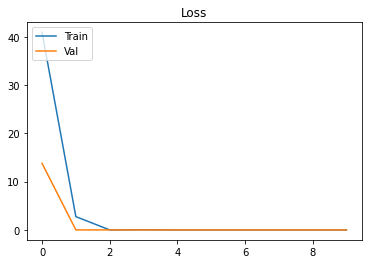

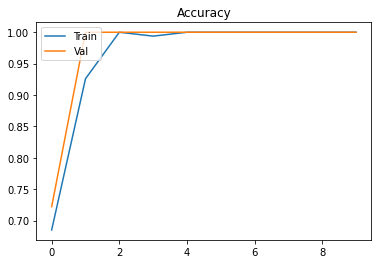

In [15]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.figure()
plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.figure()
plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [16]:
loss, acc = model.evaluate(image_test, labels_test_onehot)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss 0.0
Test Accuracy 1.0


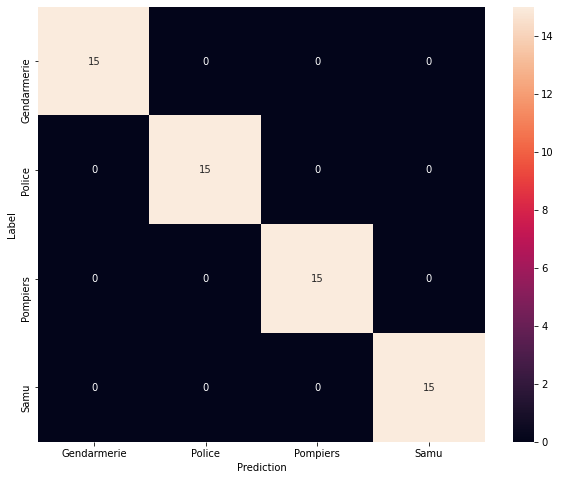

In [17]:
y_pred = np.argmax(model.predict(image_test), axis=1)

yy = []
for i in range(0,len(target_test_s)):
    if target_test_s[i] == 'Gendarmerie':
        yy.append(0)
    if target_test_s[i] == 'Police':
        yy.append(1)
    if target_test_s[i] == 'Pompiers':
        yy.append(2)
    if target_test_s[i] == 'Samu':
        yy.append(3)

commands = []
commands.append('Gendarmerie')
commands.append('Police')
commands.append('Pompiers')
commands.append('Samu')

y_true = yy

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=commands, yticklabels=commands, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()